# Problem
- From: [3Blue1Brown Youtube](https://www.youtube.com/watch?v=8idr1WZ1A7Q)
- An online e-commerce website has 3 products
    + **A**: 10 reviews, score 100%
    + **B**: 50 reviews, score 96%
    + **C**: 200 reviews, score 93%
- Which one should you buy?

# Simple Model Solution
- More data = more reliable

- Assume review are only Positive or Negative
    + **A**: 10/10 positives
    + **B**: 48/50 positives - 2/50 negatives
    + **C**: 186/200 positives - 14/200 negatives

- Pretend there are 2 more reviews (1 postive - 1 negative) for each product
    + **A**: 11/12 $\to$ 91.7%
    + **B**: 49/52 $\to$ 94.2%
    + **A**: 187/202 $\to$ 92.6%

- We should go for **B**
    + Known as Laplace rule of succession

# Complex Model Solution
## 1. Build the model - Binomial Distribution
- Assume seller giving Positive/Negative experience randomly
    - $P(\text{Positive experience}) = s$
    - $P(\text{Negative experience}) = 1-s$

- Each observation we see = 1 experiment. Eg:
    + Sampling $s_A$ 10 times gives 10 positives
    + Sampling $s_B$ 50 times gives 48 positives
    + Sampling $s_C$ 200 times gives 186 positives

- Through the observations we examine how likelihood they are

#### Given s, Get the obervations: P(positives|s) - Simulation
- Assume we know each seller probability to give away positive comments: s
- Find the probability to get the observations
    + **A**: $s_A$ = 0.95, Find $P(10/10\ |\ s_A)$
    + **B**: $s_B$ = 0.95, Find $P(48/50\ |\ s_B)$
    + **C**: $s_C$ = 0.95, Find $P(186/200\ |\ s_C)$

In [1]:
from random import random
import numpy as np
import matplotlib.pyplot as plt

def is_positive(s):
    return True if random() < s else False

def do_experiments(s, no_of_reviews, N=100000):
    # Do experiments
    freq = dict.fromkeys(range(no_of_reviews+1), 0)
    total = 0
    for n in range(N):
        cnt = 0
        for i in range(no_of_reviews):
            if is_positive(s): cnt += 1
        freq[cnt] += 1
        total += 1
    
    # Visualize
    plt.figure(figsize=(10,5))
    plt.bar(
        x=freq.keys(),
        height=freq.values())
    plt.plot(
        np.fromiter(freq.keys(), dtype=float),
        np.fromiter(freq.values(), dtype=float),
        color='r')
    plt.show()
    return freq, total

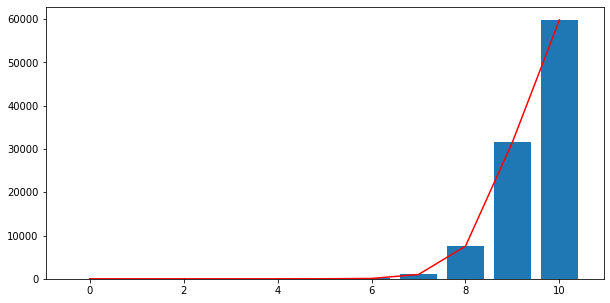

P(10/10 positives | s=0.95) = 59.80%


In [2]:
# s = 0.95, 10 reviews
freq, total = do_experiments(s=0.95, no_of_reviews=10)
print("P(10/10 positives | s=0.95) = {:.2f}%".format(freq[10]/total * 100))

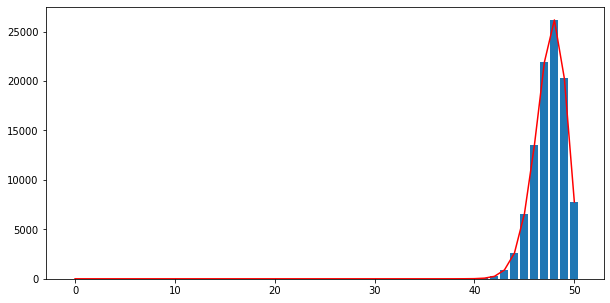

P(48/50 positives | s=0.95) = 26.18%


In [3]:
# s = 0.95, 50 reviews
freq, total = do_experiments(s=0.95, no_of_reviews=50)
print("P(48/50 positives | s=0.95) = {:.2f}%".format(freq[48]/total * 100))

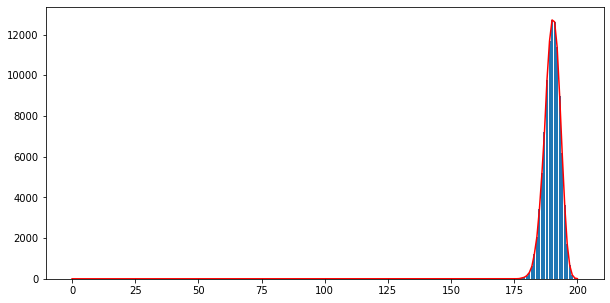

P(186/200 positives | s=0.95) = 5.21%


In [4]:
# s = 0.95, 200 reviews
freq, total = do_experiments(s=0.95, no_of_reviews=200)
print("P(186/200 positives | s=0.95) = {:.2f}%".format(freq[186]/total * 100))

#### Given s, Get the obervations: P(positives|s) - Binomial Distribution

- $P(positives|s)\ =\ C_{no\_of\_reviews}^{positives}s^{positives}(1-s)^{negatives}$
    - s = 0.95, 10/10 comments are positives
        + $P(\text{10/10 positives}\ |\ s=0.95) = C_{10}^{10}0.95^{10}(1-0.95)^0 = 59.87\%$

    - s = 0.95, 48/50 comments are positives
        + $P(\text{48/50 positives}\ |\ s=0.95) = C_{50}^{48}0.95^{48}(1-0.95)^2 = 26.11\%$

    - s = 0.95, 186/200 comments are positives
        + $P(\text{186/200 positives}\ |\ s=0.95) = C_{200}^{186}0.95^{186}(1-0.95)^{14} = 5.18\%$

- Find s that maximize P(positives|s)

In [5]:
from scipy.special import comb

def P_data_s(positives, no_of_reviews, s):
    return comb(N=no_of_reviews, k=positives, exact=True)*s**(positives)*(1-s)**(no_of_reviews-positives)

In [6]:
def simulate(positives, no_of_reviews, N=10000):
    # Simulate
    all_s = np.linspace(0, 1, N)
    prob = dict()

    for s in all_s:
        prob[s] = P_data_s(positives, no_of_reviews, s)

    # Visualize
    plt.figure(figsize=(10,5))
    plt.bar(
        x=prob.keys(),
        height=prob.values(),
        width=0.0005)
    plt.plot(
        np.fromiter(prob.keys(), dtype=float),
        np.fromiter(prob.values(), dtype=float),
        color='r')
    plt.show()

    return prob

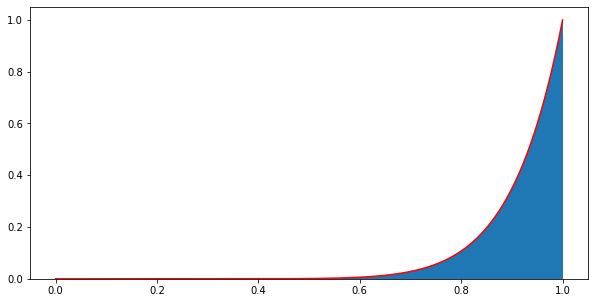

P(10/10 | s) max = 1.0 when s = 1.0


In [7]:
prob = simulate(positives=10, no_of_reviews=10)

s_max = max(prob.keys(), key=(lambda k: prob[k]))
print("P(10/10 | s) max = {} when s = {}".format(prob[s_max], s_max))

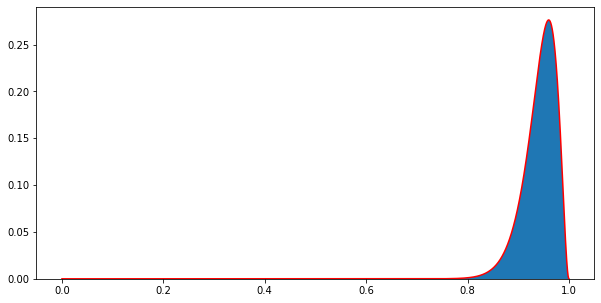

P(48/50 | s) max = 0.2762328045258244 when s = 0.9599959995999601


In [8]:
prob = simulate(positives=48, no_of_reviews=50)

s_max = max(prob.keys(), key=(lambda k: prob[k]))
print("P(48/50 | s) max = {} when s = {}".format(prob[s_max], s_max))

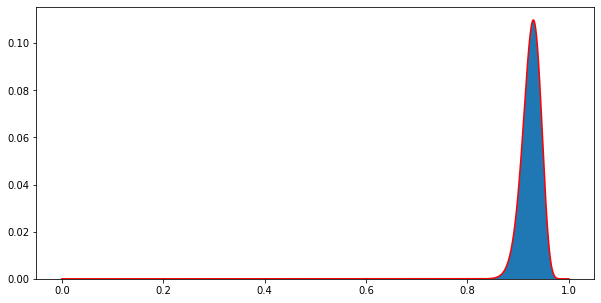

P(186/200 | s) max = 0.10990217149851342 when s = 0.9299929992999301


In [9]:
prob = simulate(positives=186, no_of_reviews=200)

s_max = max(prob.keys(), key=(lambda k: prob[k]))
print("P(186/200 | s) max = {} when s = {}".format(prob[s_max], s_max))

#### Given observations, Find s - Simulation
- Our goal is to estimate s given some observations
    + **A**: 10/10 positives -> Find $P(s_A | 10/10)$
    + **B**: 48/50 positives -> Find $P(s_B | 10/10)$
    + **A**: 186/200 positives -> Find $P(s_C | 10/10)$